In [1]:
%matplotlib inline

In [2]:
from analysis_tree_helpers import HTree
import scipy.io as sio
import pandas as pd

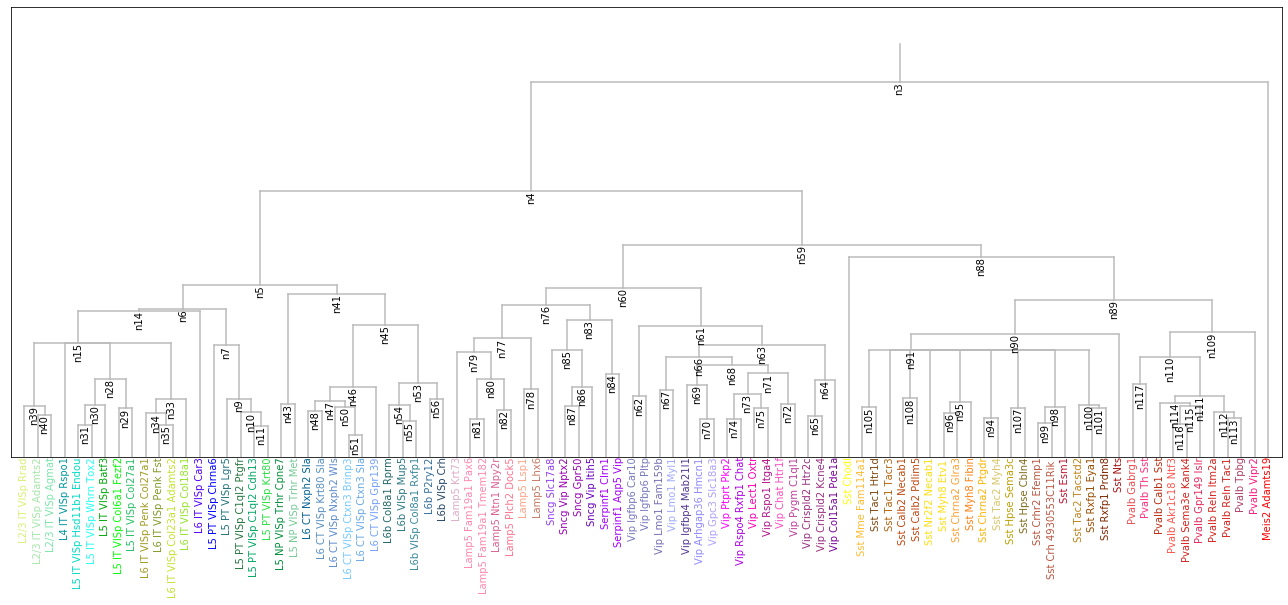

In [3]:
#Load a tree from the .csv file
htree = HTree(htree_file='/Users/fruity/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/dend_RData_Tree_20181220.csv')
htree.plot(figsize=(18,8),fontsize=10)

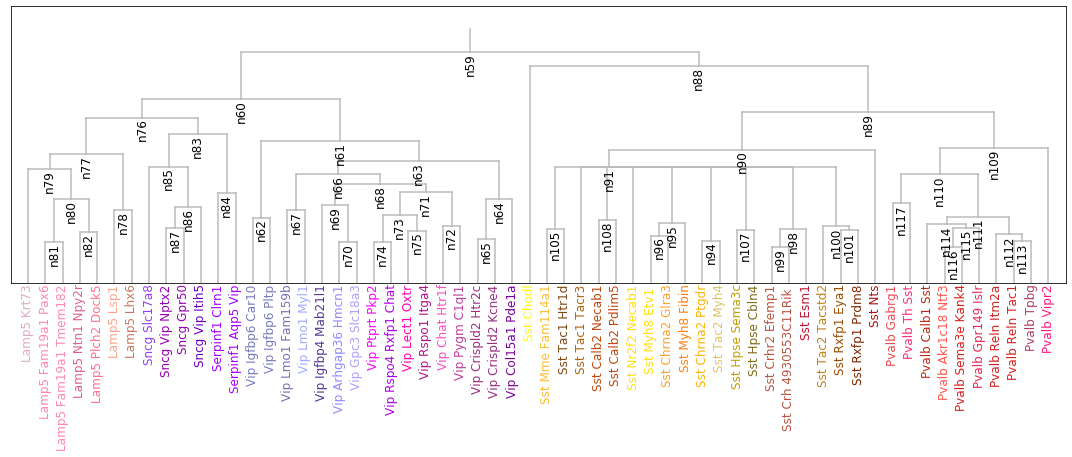

In [4]:
#Extract a subtree from this tree. subtree is a instance of class HTree as well:
inh_subtree = htree.get_subtree(node='n59')
inh_subtree.plot((15,5),fontsize=12)

In [5]:
matdict = sio.loadmat('/Users/fruity/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/PS_v4_beta_0-4_matched.mat',squeeze_me=True)
hist = pd.Series(matdict['cluster']).value_counts().to_frame().reset_index()
hist.rename(columns = {'index':'celltype',0:'counts'},inplace=True)
well_sampled_types = hist[hist['counts']>=10]
best_classes = well_sampled_types['celltype'].values

In [6]:
kepttree_nodes=[]
for node in best_classes:
    kepttree_nodes.extend(inh_subtree.get_ancestors(node))
    kepttree_nodes.extend([node])

In [7]:
best_subtree_df = inh_subtree.obj2df()

In [8]:
best_subtree=HTree(htree_df=best_subtree_df[best_subtree_df['child'].isin(kepttree_nodes)])

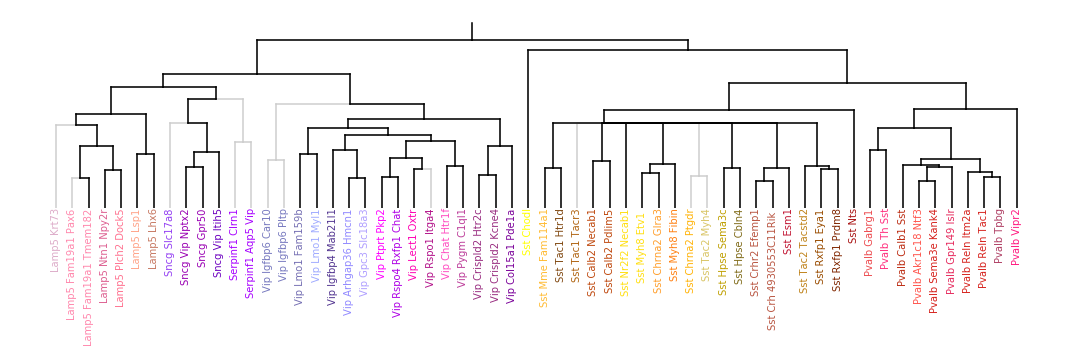

In [9]:
#sns.set_style("whitegrid")
inh_subtree.col[~inh_subtree.isleaf]='#999999'
inh_subtree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=True)
best_subtree.plot((15,5),skeletononly=True,skeletoncol='k',fig=plt.gcf())
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()
#plt.savefig('/Users/fruity/Desktop/More-than-10-samples.png')